In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('territories.json', 'r') as fd:
    territories = json.load(fd)

In [3]:
years = list(territories.keys())
seasons = list(territories[years[0]].keys())
assert len(seasons) == 3
players = list(set(territories[years[0]][seasons[0]].values()))
assert len(players) == 7
centres = list(territories[years[-1]][seasons[0]].keys())
assert len(centres) == 34

In [4]:
df = pd.DataFrame()
for player in players:
    for year in years:
        controlled_centres = [c for c, p in territories[year]['winter'].items() if p == player]
        df = df.append({'player': player, 
                        'year': year, 
                        'centre_count': len(controlled_centres)},
                       ignore_index=True)
df.set_index('year', inplace=True)

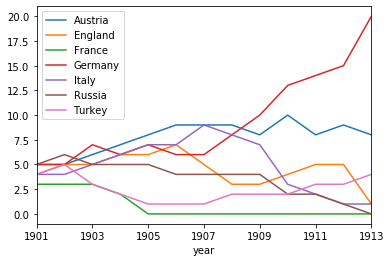

In [5]:
df.groupby('player')['centre_count'].plot(legend=True);